In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
df = pd.read_csv(url, header=None, names=column_names)

# 'Rings' is the target variable (age)
X = df.drop("Rings", axis=1)
y = df["Rings"]

# Convert categorical variable 'Sex' into numerical using one-hot encoding
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_predictions))

Logistic Regression Accuracy: 0.2811004784688995
Random Forest Accuracy: 0.2452153110047847
SVM Accuracy: 0.31100478468899523
Decision Tree Accuracy: 0.21291866028708134


In [43]:
# Randomly select an example from the original dataset
example_index = np.random.choice(df.shape[0])

# Extract features for the selected example
example_features = X.iloc[example_index, :].values.reshape(1, -1)

# Standardize the features using the same scaler used for training
example_features_scaled = scaler.transform(example_features)

# Display the actual 'Rings' value for the selected example
actual_rings_value = y.iloc[example_index]
print("Actual 'Rings' Value:", actual_rings_value)

# Use the trained models to predict 'Rings' for the selected example
logistic_prediction = logistic_model.predict(example_features_scaled)[0]
random_forest_prediction = random_forest_model.predict(example_features_scaled)[0]
svm_prediction = svm_model.predict(example_features_scaled)[0]
decision_tree_prediction = decision_tree_model.predict(example_features_scaled)[0]

# Display the model predictions for 'Rings'
print("\nLogistic Regression Prediction for 'Rings':", logistic_prediction)
print("Random Forest Prediction for 'Rings':", random_forest_prediction)
print("SVM Prediction for 'Rings':", svm_prediction)
print("Decision Tree Prediction for 'Rings':", decision_tree_prediction)


Actual 'Rings' Value: 11

Logistic Regression Prediction for 'Rings': 10
Random Forest Prediction for 'Rings': 10
SVM Prediction for 'Rings': 10
Decision Tree Prediction for 'Rings': 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
import numpy as np

# Generate sample data
sample_data = pd.DataFrame({
    "Length": np.random.uniform(0, 1, size=5),
    "Diameter": np.random.uniform(0, 1, size=5),
    "Height": np.random.uniform(0, 1, size=5),
    "WholeWeight": np.random.uniform(0, 1, size=5),
    "ShuckedWeight": np.random.uniform(0, 1, size=5),
    "VisceraWeight": np.random.uniform(0, 1, size=5),
    "ShellWeight": np.random.uniform(0, 1, size=5),
})

# Since 'Sex' was one-hot encoded
sample_data["Sex_I"] = np.random.choice([0, 1], size=5)
sample_data["Sex_M"] = np.random.choice([0, 1], size=5)

# Standardize the sample data using the same scaler used for training
sample_data_scaled = scaler.transform(sample_data)

# Make predictions using the trained models
logistic_predictions = logistic_model.predict(sample_data_scaled)
random_forest_predictions = random_forest_model.predict(sample_data_scaled)
svm_predictions = svm_model.predict(sample_data_scaled)
decision_tree_predictions = decision_tree_model.predict(sample_data_scaled)

# Display the predictions
print("Logistic Regression Predictions:", logistic_predictions)
print("Random Forest Predictions:", random_forest_predictions)
print("SVM Predictions:", svm_predictions)
print("Decision Tree Predictions:", decision_tree_predictions)

Logistic Regression Predictions: [14 16 18 16 16]
Random Forest Predictions: [ 7 13 12 12  9]
SVM Predictions: [10 10 10 10 10]
Decision Tree Predictions: [11  6 17 12 13]


   Logistic Regression  Random Forest  SVM  Decision Tree
0                   10             13   10             15
1                    9              8    9             12
2                   13             12   10             17
3                   11             11   10             11
4                   10             13    9             13

Actual Values (from original dataset): [ 7  8  9  5 11]


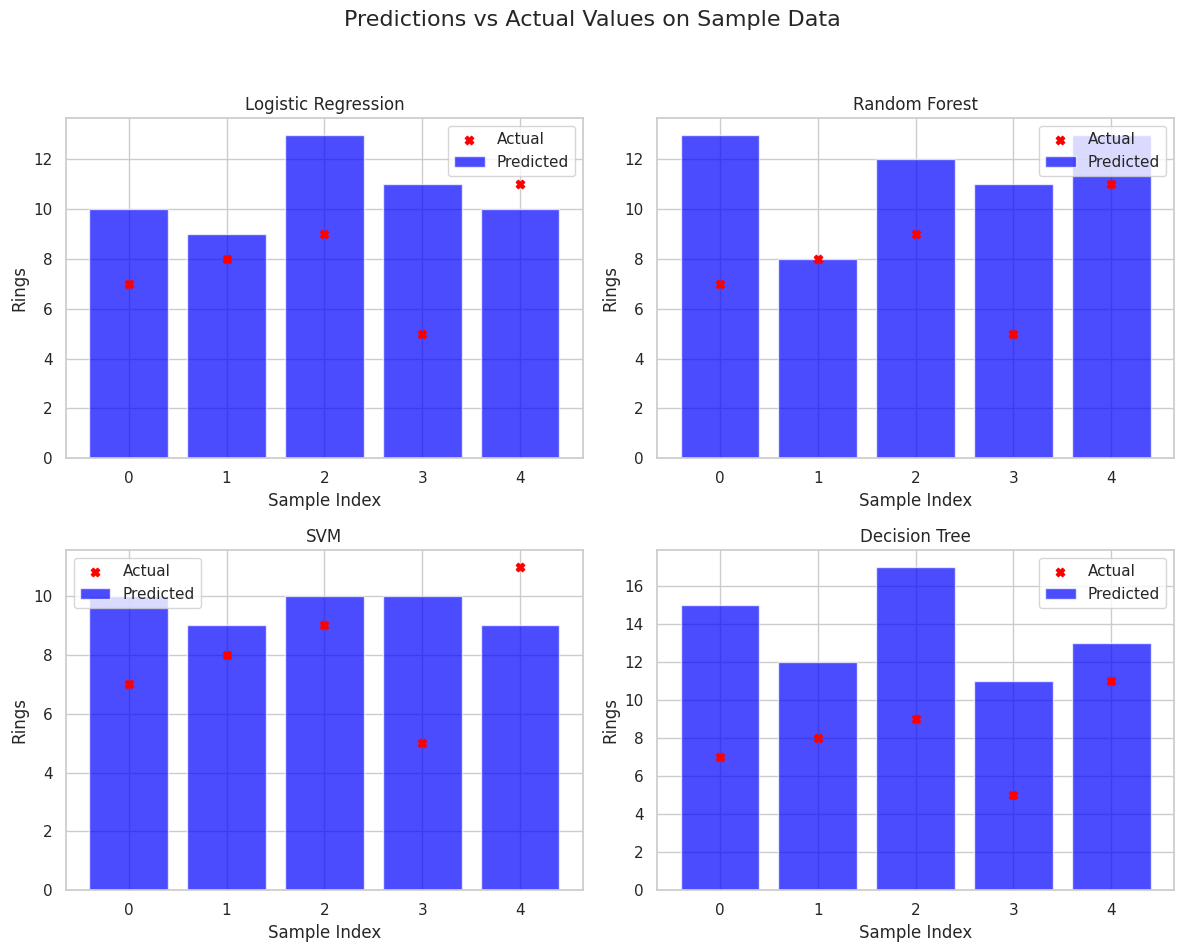

In [54]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    "Logistic Regression": logistic_predictions,
    "Random Forest": random_forest_predictions,
    "SVM": svm_predictions,
    "Decision Tree": decision_tree_predictions,
})

# Select five random indexes from the original dataset
selected_indexes = np.random.choice(df.index, size=5, replace=False)

# Extract actual target values for the selected indexes
actual_values = df.loc[selected_indexes, "Rings"].values

# Display the predictions DataFrame
print(predictions_df)
print("\nActual Values (from original dataset):", actual_values)

# Plot bar charts for each model's predictions and actual values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Predictions vs Actual Values on Sample Data', fontsize=16)

for i, (model, predictions) in enumerate(predictions_df.items()):
    ax = axes[i // 2, i % 2]
    ax.bar(range(len(predictions)), predictions, color='blue', alpha=0.7, label='Predicted')
    ax.scatter(range(len(actual_values)), actual_values, color='red', marker='X', label='Actual')
    ax.set_title(model)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Rings')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
